Task-0-Titanic Exploration

Name : Gaurav Sandeep Pendharkar

Registration No.: 20BAI1153

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


A .This cell performs the following :-

1.   Reading the CSV from the mounted drive into a dataframe 'df'.
2.   Displaying first five rows of the dataframe 'df'.




In [32]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


B. Understanding the features of the dataset to know where the NULL values exist.

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


C. Dropping all the rows containing NULL values and verifying it using info function.

In [34]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


D. Dropping the columns PassengerId and Name from the dataframe 'df' and verifying the same using head function.

In [35]:
df = df.drop(['PassengerId', 'Name'], axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
6,0,1,male,54.0,0,0,17463,51.8625,E46,S
10,1,3,female,4.0,1,1,PP 9549,16.7000,G6,S
11,1,1,female,58.0,0,0,113783,26.5500,C103,S


E. Dividing the dataset into 80:20 ratio using iloc() function and resetting the indices of the fragmented dataframes.

In [36]:
df1 = df.iloc[:int(len(df)*0.8)+1].reset_index(drop = True)
df2 = df.iloc[int(len(df)*0.8)+1:].reset_index(drop = True)

F. Verifying whether the dataframe 'df' was partitioned in the appropriate ratio

**Note :** The 80% of the dataset is fractional(i.e. 146.4), so 145th row is taken as a part of the first dataframe.Consequently, the round() function is used.

In [37]:
print('df1 contains ',len(df1),'rows.(i.e.',round(len(df1)*100/len(df)),'%) of the parent dataset')
print('df2 contains ',len(df2),'rows.(i.e.',round(len(df2)*100/len(df)),'%) of the parent dataset')

df1 contains  147 rows.(i.e. 80 %) of the parent dataset
df2 contains  36 rows.(i.e. 20 %) of the parent dataset


G. Displaying the first 5 entries in dataframe 1.

In [38]:
df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,1,male,48.0,1,0,19996,52.000,C126,S
1,0,3,male,19.0,0,0,348124,7.650,F G73,S
2,1,1,female,38.0,0,0,PC 17757,227.525,C45,C
3,1,2,female,27.0,0,0,34218,10.500,E101,S
4,1,1,male,27.0,1,0,113806,53.100,E8,S


H. Displaying the last 5 entries in dataframe 2.

In [39]:
df1.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
142,0,3,male,42.0,0,0,348121,7.6500,F G63,S
143,1,1,female,18.0,1,0,PC 17757,227.5250,C62 C64,C
144,1,1,male,35.0,0,0,PC 17475,26.2875,E24,S
145,1,1,male,42.0,0,0,PC 17476,26.2875,E24,S
146,1,1,female,24.0,0,0,PC 17482,49.5042,C90,C


I. Plotting a histogram for the Age and Fare columns.

Text(0.5, 1.0, 'Age v/s Passenger Fares')

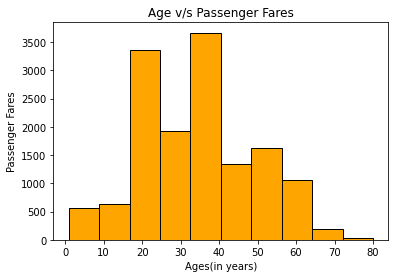

In [40]:
plt.hist(df.Age, weights=df.Fare,color='orange',edgecolor='black')
plt.xlabel('Ages(in years)')
plt.ylabel('Passenger Fares')
plt.title('Age v/s Passenger Fares')

J. Plotting a bar chart for binary columns 'Survival' and 'Sex'.

Text(0.5, 1.0, 'Survival Visualization during Titanic Mishap')

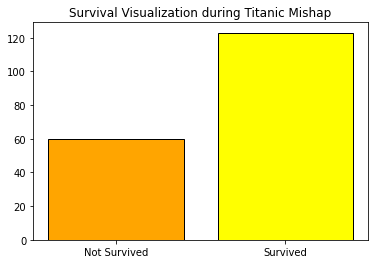

In [63]:
s = df['Survived'].value_counts()
plt.bar(dict(s).keys(),dict(s).values(),color=["yellow","orange"],edgecolor="black")
plt.xticks([0,1],["Not Survived","Survived"])
plt.title('Survival Visualization during Titanic Mishap')

In [59]:
s = df['Survived'].value_counts()
dict(s).keys()
s

1    123
0     60
Name: Survived, dtype: int64

Text(0.5, 1.0, 'Passenger Gender Demographics on Titanic')

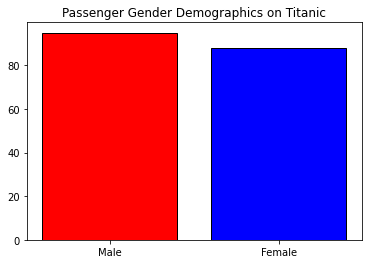

In [65]:
s = df['Sex'].value_counts()
plt.bar(dict(s).keys(),dict(s).values(),color=["red","blue"],edgecolor="black")
plt.xticks([0,1],["Male","Female"])
plt.title("Passenger Gender Demographics on Titanic")